In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('C:\\Users\\suraj\\Downloads\\Capstone project\\Group_3_Beijing_Air_Quality\\PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv',index_col=0)
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [11]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [12]:
df.RAIN.value_counts()

0.0     33664
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
7.0         1
36.6        1
6.3         1
20.3        1
23.6        1
Name: RAIN, Length: 127, dtype: int64

In [13]:
import statsmodels.api as sm

In [14]:
X = df[['year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
for i in X.columns:
    X[i].fillna(X[i].median(),inplace = True)
X.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [16]:
X.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [79]:
for i in ['PM2.5','PM10','SO2','NO2','CO','O3']:
    print('Result with dependent variable as:', i)
    y = X[i]
    X.drop(i,axis = 1,inplace = True)
    Xc = sm.add_constant(X)
    LR = sm.OLS(y,Xc).fit()
    print(LR.summary())
    print('*'*80)
    X[i] = y

Result with dependent variable as: PM2.5
                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.345e+04
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:22:31   Log-Likelihood:            -1.7143e+05
No. Observations:               35064   AIC:                         3.429e+05
Df Residuals:                   35049   BIC:                         3.430e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

C:\Users\clicklabs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Result with dependent variable as: NO2
                            OLS Regression Results                            
Dep. Variable:                    NO2   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     6064.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:22:32   Log-Likelihood:            -1.5440e+05
No. Observations:               35064   AIC:                         3.088e+05
Df Residuals:                   35049   BIC:                         3.090e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

strong multicollinearity or other numerical problems.
********************************************************************************


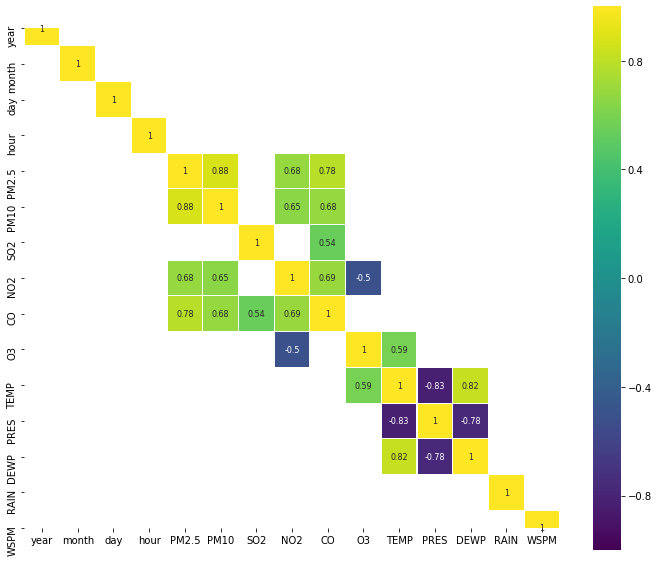

In [80]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>0.5)|(corr<-0.5)],annot = True,cmap='viridis',linewidths=0.1, square=True,annot_kws={"size": 8},vmax=1.0, vmin=-1.0)